# Question1 
Re-analyse the annual maximum gust wind speeds for (I) the years 1952 to 1998, (II) the years 1952 to 1997, i.e. ignore the high value recorded in 1998. Compare the resulting predictions of design wind speeds for (a) 50 years return period, and (b) 1000 years return period, and comment.
# Question2 
Using the parameter estimation approach in code GB 50009 2012, predict the 10, 20, 50, 100, 200, 500, 1000 years return period design wind speeds for the above two cases, and compare the results with the Gumbel approach.


In [1]:
# 导入必要的库，pandas用于数据处理
import pandas as pd
from io import StringIO # python3中StringIO的位置


# 加载数据
data = """
year,Wind speed m/s
1952,31.4
1953,33.4
1954,29.8
1955,30.3
1956,27.8
1957,30.3
1958,29.3
1959,36.5
1960,29.3
1961,27.3
1962,31.9
1963,28.8
1964,25.2
1965,27.3
1966,23.7
1967,27.8
1968,32.4
1969,27.8
1970,26.2
1971,30.9
1972,31.9
1973,27.3
1974,25.7
1975,32.9
1976,28.3
1977,27.3
1978,28.3
1979,28.3
1980,29.3
1981,27.8
1982,27.8
1983,30.9
1984,26.7
1985,30.3
1986,28.3
1987,30.3
1988,34
1989,28.8
1990,30.3
1991,27.3
1992,27.8
1993,28.8
1994,30.9
1995,26.2
1996,25.7
1997,24.7
1998,42.2
"""

# 将data数据转换为StringIO对象，再读取为DataFrame
df = pd.read_csv(StringIO(data)) 

# Answer


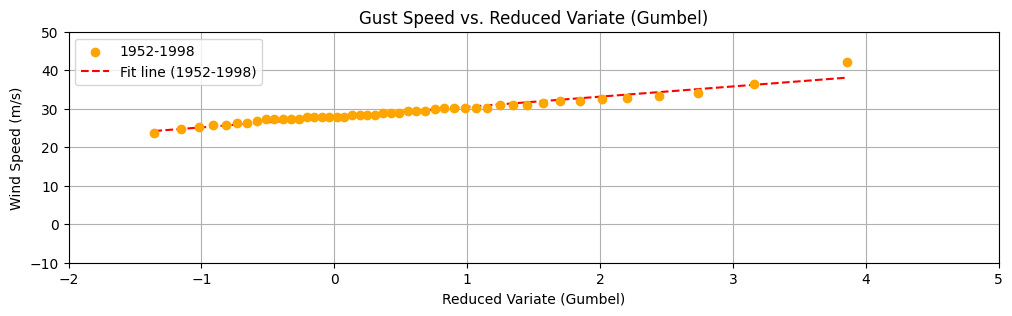

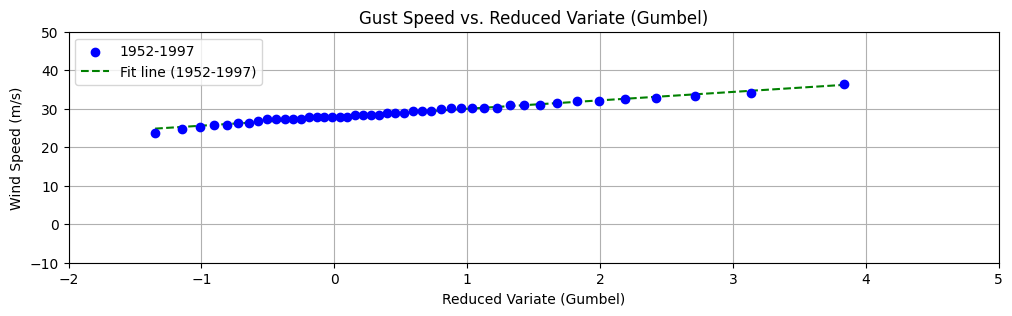

(Gumbel)1952-1998年拟合线方程: y = 2.659x + 27.811
(Gumbel)1952-1997年拟合线方程: y = 2.192x + 27.786


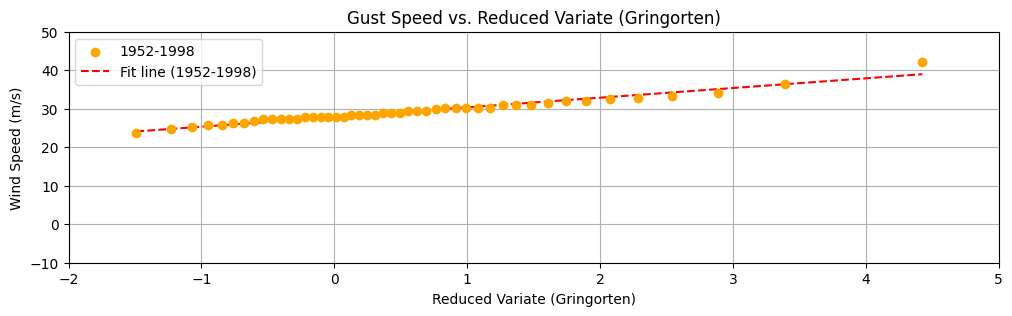

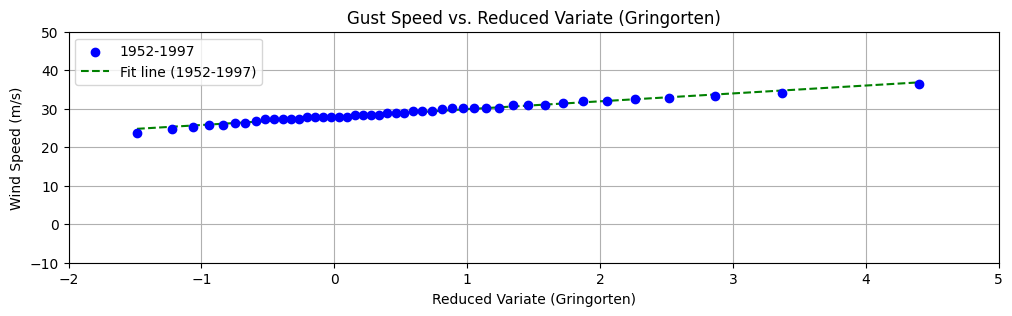

(Gringorten)1952-1998年拟合线方程: y = 2.513x + 27.840
(Gringorten)1952-1997年拟合线方程: y = 2.050x + 27.822


In [2]:
import numpy as np  
from scipy.stats import linregress  
import matplotlib.pyplot as plt  


df = df.sort_values(by="Wind speed m/s").reset_index(drop=True)
df_1952_1997 = df[df.year < 1998]  

# Gumbel approach:
def Gumbel_reduced_variate(data):  
    N = len(data)  
    m = np.arange(1, N + 1)  
    p = m / (N + 1)  
    return -np.log(-np.log(p))

# Gringorten approach:
def Gringorten_reduced_variate(data):  
    N = len(data)  
    m = np.arange(1, N + 1)  
    p = (m - 0.44) / (N + 0.12)  
    return -np.log(-np.log(p))  


# (I) 1952到1998年  
Gumbel_reduced_variate_1952_1998 = Gumbel_reduced_variate(df['Wind speed m/s'])  
Gumbel_wind_speeds_1952_1998 = df['Wind speed m/s'].values

Gringorten_reduced_variate_1952_1998 = Gringorten_reduced_variate(df['Wind speed m/s'])  
Gringorten_wind_speeds_1952_1998 = df['Wind speed m/s'].values

# (II) 1952到1997年  
Gumbel_reduced_variate_1952_1997 = Gumbel_reduced_variate(df_1952_1997['Wind speed m/s'])  
Gumbel_wind_speeds_1952_1997 = df_1952_1997['Wind speed m/s'].values  

Gringorten_reduced_variate_1952_1997 = Gringorten_reduced_variate(df_1952_1997['Wind speed m/s'])  
Gringorten_wind_speeds_1952_1997 = df_1952_1997['Wind speed m/s'].values  


# 绘图  
plt.figure(figsize=(12, 3))  

# 绘制1952到1998年的数据  
plt.scatter(Gumbel_reduced_variate_1952_1998,
            Gumbel_wind_speeds_1952_1998, color='orange', 
            label='1952-1998', zorder=5)  
Gumbel_slope_1998, Gumbel_intercept_1998, _, _, _ = linregress(
    Gumbel_reduced_variate_1952_1998, Gumbel_wind_speeds_1952_1998)  
plt.plot(
    Gumbel_reduced_variate_1952_1998, 
    Gumbel_slope_1998 * Gumbel_reduced_variate_1952_1998 + 
    Gumbel_intercept_1998, 'r--',
    label='Fit line (1952-1998)') 

# 图形设置  
plt.title('Gust Speed vs. Reduced Variate (Gumbel)')  
plt.xlabel('Reduced Variate (Gumbel)')  
plt.ylabel('Wind Speed (m/s)')  
plt.legend()  
plt.grid()  
plt.xlim(-2, 5)  
plt.ylim(-10, 50)  
plt.show() 


# 绘图  
plt.figure(figsize=(12, 3))  
# 绘制1952到1997年的数据  
plt.scatter(Gumbel_reduced_variate_1952_1997, Gumbel_wind_speeds_1952_1997, 
            color='blue', label='1952-1997', zorder=5)  
Gumbel_slope_1997, Gumbel_intercept_1997, _, _, _ = linregress(
    Gumbel_reduced_variate_1952_1997, Gumbel_wind_speeds_1952_1997)  
plt.plot(Gumbel_reduced_variate_1952_1997, 
         Gumbel_slope_1997 * Gumbel_reduced_variate_1952_1997 + Gumbel_intercept_1997, 
         'g--', label='Fit line (1952-1997)')  


# 添加线性函数表达式  
Gumbel_equation_1998 = f'y = {Gumbel_slope_1998:.3f}x + {Gumbel_intercept_1998:.3f}'  
Gumbel_equation_1997 = f'y = {Gumbel_slope_1997:.3f}x + {Gumbel_intercept_1997:.3f}'  


# 图形设置  
plt.title('Gust Speed vs. Reduced Variate (Gumbel)')  
plt.xlabel('Reduced Variate (Gumbel)')  
plt.ylabel('Wind Speed (m/s)')  
plt.legend()  
plt.grid()  
plt.xlim(-2, 5)  
plt.ylim(-10, 50)  
plt.show() 


# 打印线性函数表达式
print(f"(Gumbel)1952-1998年拟合线方程: {Gumbel_equation_1998}")
print(f"(Gumbel)1952-1997年拟合线方程: {Gumbel_equation_1997}")



# 绘图  
plt.figure(figsize=(12, 3))  

# 绘制1952到1998年的数据  
plt.scatter(Gringorten_reduced_variate_1952_1998,
            Gringorten_wind_speeds_1952_1998, color='orange', 
            label='1952-1998', zorder=5)  
Gringorten_slope_1998, Gringorten_intercept_1998, _, _, _ = linregress(
    Gringorten_reduced_variate_1952_1998, Gringorten_wind_speeds_1952_1998)  

plt.plot(
    Gringorten_reduced_variate_1952_1998, 
    Gringorten_slope_1998 * Gringorten_reduced_variate_1952_1998 + 
    Gringorten_intercept_1998, 'r--',
    label='Fit line (1952-1998)')  

# 图形设置  
plt.title('Gust Speed vs. Reduced Variate (Gringorten)')  
plt.xlabel('Reduced Variate (Gringorten)')  
plt.ylabel('Wind Speed (m/s)')  
plt.legend()  
plt.grid()  
plt.xlim(-2, 5)  
plt.ylim(-10, 50)  
plt.show()


# 绘图  
plt.figure(figsize=(12, 3))  
# 绘制1952到1997年的数据  
plt.scatter(Gringorten_reduced_variate_1952_1997, Gringorten_wind_speeds_1952_1997, 
            color='blue', label='1952-1997', zorder=5)  
Gringorten_slope_1997, Gringorten_intercept_1997, _, _, _ = linregress(
    Gringorten_reduced_variate_1952_1997, Gringorten_wind_speeds_1952_1997)  
plt.plot(Gringorten_reduced_variate_1952_1997, 
         Gringorten_slope_1997 * Gringorten_reduced_variate_1952_1997 + Gringorten_intercept_1997, 
         'g--', label='Fit line (1952-1997)')  


# 添加线性函数表达式  
Gringorten_equation_1998 = f'y = {Gringorten_slope_1998:.3f}x + {Gringorten_intercept_1998:.3f}'  
Gringorten_equation_1997 = f'y = {Gringorten_slope_1997:.3f}x + {Gringorten_intercept_1997:.3f}'  


# 图形设置  
plt.title('Gust Speed vs. Reduced Variate (Gringorten)')  
plt.xlabel('Reduced Variate (Gringorten)')  
plt.ylabel('Wind Speed (m/s)')  
plt.legend()  
plt.grid()  
plt.xlim(-2, 5)  
plt.ylim(-10, 50)  
plt.show()


# 打印线性函数表达式
print(f"(Gringorten)1952-1998年拟合线方程: {Gringorten_equation_1998}")
print(f"(Gringorten)1952-1997年拟合线方程: {Gringorten_equation_1997}")

In [3]:
# 计算返回周期设计风速的函数  
def design_wind_speed(data, return_period, slope_year, intercept_year):  
    return intercept_year + slope_year * (-np.log(-np.log(1 - 1 / return_period)))


# 问题 1：比较两种情况下的50年和1000年的设计风速  
# (I) 1952到1998年  
Gumbel_design_speed_50_1952_1998 = design_wind_speed(df['Wind speed m/s'], 50, 
                                              Gumbel_slope_1998, Gumbel_intercept_1998)  
Gumbel_design_speed_1000_1952_1998 = design_wind_speed(df['Wind speed m/s'], 1000, Gumbel_slope_1998, Gumbel_intercept_1998)
Gringorten_design_speed_50_1952_1998 = design_wind_speed(df['Wind speed m/s'], 50, 
                                              Gringorten_slope_1998, Gringorten_intercept_1998)  
Gringorten_design_speed_1000_1952_1998 = design_wind_speed(df['Wind speed m/s'], 1000, Gringorten_slope_1998, Gringorten_intercept_1998)


# (II) 1952到1997年，忽略1998
Gumbel_design_speed_50_1952_1997 = design_wind_speed(df_1952_1997['Wind speed m/s'], 50, Gumbel_slope_1997, Gumbel_intercept_1997)  
Gumbel_design_speed_1000_1952_1997 = design_wind_speed(df_1952_1997['Wind speed m/s'], 1000, Gumbel_slope_1997, Gumbel_intercept_1997)  
Gringorten_design_speed_50_1952_1997 = design_wind_speed(df_1952_1997['Wind speed m/s'], 50, Gringorten_slope_1997, Gringorten_intercept_1997)  
Gringorten_design_speed_1000_1952_1997 = design_wind_speed(df_1952_1997['Wind speed m/s'], 1000, Gringorten_slope_1997, Gringorten_intercept_1997)  

# 打印结果  
print("(Gumbel)比较两种情况下的设计风速：")  
print(f"1952至1998年的50年设计风速: {Gumbel_design_speed_50_1952_1998:.2f} m/s")  
print(f"1952至1998年的1000年设计风速: {Gumbel_design_speed_1000_1952_1998:.2f} m/s")  
print(f"1952至1997年的50年设计风速: {Gumbel_design_speed_50_1952_1997:.2f} m/s")  
print(f"1952至1997年的1000年设计风速: {Gumbel_design_speed_1000_1952_1997:.2f} m/s")  
print("\n(Gringorten)比较两种情况下的设计风速：") 
print(f"1952至1998年的50年设计风速: {Gringorten_design_speed_50_1952_1998:.2f} m/s")  
print(f"1952至1998年的1000年设计风速: {Gringorten_design_speed_1000_1952_1998:.2f} m/s")  
print(f"1952至1997年的50年设计风速: {Gringorten_design_speed_50_1952_1997:.2f} m/s")  
print(f"1952至1997年的1000年设计风速: {Gringorten_design_speed_1000_1952_1997:.2f} m/s")  

(Gumbel)比较两种情况下的设计风速：
1952至1998年的50年设计风速: 38.19 m/s
1952至1998年的1000年设计风速: 46.18 m/s
1952至1997年的50年设计风速: 36.34 m/s
1952至1997年的1000年设计风速: 42.93 m/s

(Gringorten)比较两种情况下的设计风速：
1952至1998年的50年设计风速: 37.64 m/s
1952至1998年的1000年设计风速: 45.20 m/s
1952至1997年的50年设计风速: 35.82 m/s
1952至1997年的1000年设计风速: 41.98 m/s


# 总结 

By conparing the results of different sample numbers to predict winds speed, we know that:

①For 50 years return period or 1000 years return period, ignoring the 1998 high wind speed yields a smaller predicted wind speed value. In fact, the latter has smaller predicted wind speeds at any return period.

②The value of Gumbel method is larger than the value of Gringorten method.

In [4]:
# 问题 2：使用GB 50009 2012进行参数估计，预测各个返回期的设计风速  
return_periods = [10, 20, 50, 100, 200, 500, 1000]  

def GB_design_wind_speed(data, return_periods, N=47):  
    # 计算平均值和标准差  
    mean = data['Wind speed m/s'].mean()  
    std = data['Wind speed m/s'].std()  

    # 定义系数字典  
    coefficients = {  
        47: (1.155374, 0.547192),  
        46: (1.153612, 0.546746)  
    }  

    # 检查 N 是否在有效范围内  
    if N not in coefficients:  
        print('error: N 值无效，应为 46 或 47')  
        return []  

    c1, c2 = coefficients[N]  
    alpha = c1 / std  
    u = mean - c2 / alpha  
    
    # 计算每个返回期的设计风速并打印  
    results = []  
    for period in return_periods:  
        y = -np.log(-np.log(1 - 1 / period))  
        speed = u + y / alpha  
        results.append(speed)  
        print(f"\t{period}年返回周期设计风速: {speed:.2f} m/s")  
    
    return results  

# 计算结果  
print("\n使用GB 50009_2012各周期的设计风速（1952至1998年）:")  
results_1952_1998 = GB_design_wind_speed(df, return_periods, N=47)   
print("\n使用GB 50009_2012各周期的设计风速（1952至1997年）:")  
results_1952_1997 = GB_design_wind_speed(df_1952_1997, return_periods, N=46) 


print("\n使用Gumbel各周期的设计风速（1952至1998年）:") 
for period in return_periods:
    Gumbel_design_speed_1952_1998 = design_wind_speed(df['Wind speed m/s'], period, 
                                              Gumbel_slope_1998, Gumbel_intercept_1998)
    print(f"\t{period}年返回周期设计风速: {Gumbel_design_speed_1952_1998:.2f} m/s") 

print("\n使用Gumbel各周期的设计风速（1952至1997年）:") 
for period in return_periods:
    Gumbel_design_speed_1952_1997 = design_wind_speed(df['Wind speed m/s'], period, 
                                              Gumbel_slope_1997, Gumbel_intercept_1997)
    print(f"\t{period}年返回周期设计风速: {Gumbel_design_speed_1952_1997:.2f} m/s") 


使用GB 50009_2012各周期的设计风速（1952至1998年）:
	10年返回周期设计风速: 33.98 m/s
	20年返回周期设计风速: 35.97 m/s
	50年返回周期设计风速: 38.55 m/s
	100年返回周期设计风速: 40.48 m/s
	200年返回周期设计风速: 42.40 m/s
	500年返回周期设计风速: 44.94 m/s
	1000年返回周期设计风速: 46.86 m/s

使用GB 50009_2012各周期的设计风速（1952至1997年）:
	10年返回周期设计风速: 32.79 m/s
	20年返回周期设计风速: 34.40 m/s
	50年返回周期设计风速: 36.48 m/s
	100年返回周期设计风速: 38.04 m/s
	200年返回周期设计风速: 39.60 m/s
	500年返回周期设计风速: 41.65 m/s
	1000年返回周期设计风速: 43.20 m/s

使用Gumbel各周期的设计风速（1952至1998年）:
	10年返回周期设计风速: 33.79 m/s
	20年返回周期设计风速: 35.71 m/s
	50年返回周期设计风速: 38.19 m/s
	100年返回周期设计风速: 40.04 m/s
	200年返回周期设计风速: 41.89 m/s
	500年返回周期设计风速: 44.33 m/s
	1000年返回周期设计风速: 46.18 m/s

使用Gumbel各周期的设计风速（1952至1997年）:
	10年返回周期设计风速: 32.72 m/s
	20年返回周期设计风速: 34.30 m/s
	50年返回周期设计风速: 36.34 m/s
	100年返回周期设计风速: 37.87 m/s
	200年返回周期设计风速: 39.40 m/s
	500年返回周期设计风速: 41.41 m/s
	1000年返回周期设计风速: 42.93 m/s


# 总结
Comparing the results with the Gumbel approach we can obtain that:

1. The predicted gust speed value used in GB50009 is larger than the value used in the Gumbel method.
2. The calculation results of the two methods are very close, the gap is only one order of magnitude of \(10$^{-1}$\).
3. Using the approach in GB50009-2012, the calculation results of 47 samples are also larger than the results of 48 samples that ignore the high value recorded in 1998.
